# Loading the data to Google SpreadSheets

In [ ]:
import pygsheets
import pandas as pd
import numpy as np

In [ ]:
# Loads the RAW JSON commits data to python and puts it in a Pandas dataframe
with open('terraform_tf_keywords') as f:
    data = json.load(f)["repositories"]
df = pd.DataFrame(columns=["Repository", "Repo Description", "Keyword", "Commit Link", "Commit Description", "Labels"])

for repo in data:
    for commit in repo["commits"]:
        temp = pd.DataFrame({"Repository": [repo['name']], "Repo Description": [""], "Keyword": [""], "Commit Link": [(repo['name'][:-4] + "/commit/" + commit['id'])],
                   "Commit Description": [commit["msg"]] if len(commit['msg']) < 5000 else ["placeholder, too long..."], "Labels": [""]})
        df = pd.concat([df, temp], ignore_index=True)

In [ ]:
# Writes data needed for manual labeling to the Google Spreadsheets.
# If you wish to write the data to your own separate Google Spreadsheeta change the service_file and name below.

gc = pygsheets.authorize(service_file='commitevalutaion-6a3c4370bf89.json')

# open the google spreadsheet (where 'PY to Gsheet Test' is the name of my sheet)
sh = gc.open('Terraform data analysis')

# select the first sheet
wks = sh[2]

# update the first sheet with df, starting at cell B2.
wks.set_dataframe(df, (1, 1))

# Load labeled data and calculate statistics

In [2]:
# Change the service_file to one that has access to the Google Spreadsheets or use a local CSV version.
gc = pygsheets.authorize(service_file='commitevalutaion-6a3c4370bf89.json')
sheets = gc.open_by_url("https://docs.google.com/spreadsheets/d/1OYsymuoRJGAXTHQImI0ycbN2NQhsxSkqlj-W-PEHRvw/edit#gid=1782607577")
commit_sheet = sheets[0]
commit_sheet

<Worksheet 'Commits' index:0>

In [3]:
# Get a dictionary of the tables
data_dic = commit_sheet.get_all_records()
print(len(data_dic))

2422


In [4]:
df = pd.DataFrame(data=data_dic)
df

,Repository,Repo Description,Keyword,Commit Link,Commit Description,Labels,Sentiment,Check status,Summary
0,https://github.com/tkhoa2711/terraform-digital...,Playground to test Terraform with DigitalOcean...,cheap,https://github.com/tkhoa2711/terraform-digital...,provision a droplet with cheapest price,cost-saving-unknown,Positive,correct,Selected commits:
1,https://github.com/zubyranks/terraform-project...,No README,bill,https://github.com/zubyranks/terraform-project...,Added billing API & changed folder-display name,other-addition-billing,,,Checked commits:
2,https://github.com/zubyranks/terraform-project...,No README,bill,https://github.com/zubyranks/terraform-project...,Added billingAccountUser @ Org level to SA,other-addition-billing,,,- included commits:
3,https://github.com/ta8293077/tf-repo1.git,Repository containing various Terraform code,cost,https://github.com/ta8293077/tf-repo1/commit/8...,Minecraft (#18)\n\nMinecraft recipe\n\nFeature...,fork-awareness-instance,,,- excluded commits:
4,https://github.com/blinkist/terraform-aws-airs...,This is a partner project to the AWS ECS Servi...,cost,https://github.com/blinkist/terraform-aws-airs...,Removed the default use of detailed monitoring...,cost-saving-unknown,Positive,,- Incorrect classifications:
...,...,...,...,...,...,...,...,...,...
2417,https://github.com/smabubakkar/AzureTest.git,,cost,https://github.com/smabubakkar/AzureTest/commi...,Use global HTTP/TCP proxy load balancing for I...,"fork-saving-instance, fork-awareness-instance",,,
2418,https://github.com/smabubakkar/AzureTest.git,,cheap,https://github.com/smabubakkar/AzureTest/commi...,Change AWS default type from t2.small to t3.sm...,fork-saving-instance,,,
2419,https://github.com/smabubakkar/AzureTest.git,,cost,https://github.com/smabubakkar/AzureTest/commi...,Add Google Cloud worker instances to a target ...,fork-awareness-cluster,,,
2420,https://github.com/smabubakkar/AzureTest.git,,cost,https://github.com/smabubakkar/AzureTest/commi...,Change DO worker_type default from s-1vcpu-1gb...,fork-awareness-instance,,,


In [5]:
# Filter the commits that are relevant from a cost management point of view.
cost_df = df[df["Labels"].str.contains("cost-")]

In [6]:
cost_df

,Repository,Repo Description,Keyword,Commit Link,Commit Description,Labels,Sentiment,Check status,Summary
0,https://github.com/tkhoa2711/terraform-digital...,Playground to test Terraform with DigitalOcean...,cheap,https://github.com/tkhoa2711/terraform-digital...,provision a droplet with cheapest price,cost-saving-unknown,Positive,correct,Selected commits:
4,https://github.com/blinkist/terraform-aws-airs...,This is a partner project to the AWS ECS Servi...,cost,https://github.com/blinkist/terraform-aws-airs...,Removed the default use of detailed monitoring...,cost-saving-unknown,Positive,,- Incorrect classifications:
7,https://github.com/stealthHat/k8s-terraform.git,small infrascode for my AWS cluster using terr...,expense,https://github.com/stealthHat/k8s-terraform/co...,nat gateway is verry expensive,cost-awareness-networking-NAT,Negative,,
8,https://github.com/stealthHat/k8s-terraform.git,,cost,https://github.com/stealthHat/k8s-terraform/co...,move to us for better prices - I manually add...,cost-saving-area,Neutral,,
10,https://github.com/JamesWoolfenden/terraform-a...,Terraform module to provision a container pipe...,cost,https://github.com/JamesWoolfenden/terraform-a...,costs,cost-awareness-storage,Neutral,,
...,...,...,...,...,...,...,...,...,...
2392,https://github.com/singaporewaketools/iaac.git,Terraform based infrastructure,bill,https://github.com/singaporewaketools/iaac/com...,Add billing alerts,cost-awareness-alert,,,
2393,https://github.com/singaporewaketools/iaac.git,,bill,https://github.com/singaporewaketools/iaac/com...,Fix billing alert subscriptions,cost-awareness-alert,,,
2394,https://github.com/sbogacz/terraform-aws-state...,This is a simple terraform module to bootstrap...,bill,https://github.com/sbogacz/terraform-aws-state...,use DynamoDB On Demand billing for the lock ta...,cost-saving-storage,,,
2395,https://github.com/nationalarchives/tdr-grafan...,Repository containing the configuration necess...,cost,https://github.com/nationalarchives/tdr-grafan...,Move to Jenkins VPC\n\nJenkins VPC already ava...,cost-awareness-unknown,,,


In [7]:
# Create histogram for the frequency of the cost keywords
keyword_hist_cost = {}
for index, row in cost_df.iterrows():
    keyword = row["Keyword"]
    keyword_hist_cost[keyword] = keyword_hist_cost.get(keyword, 0) + 1
keyword_hist_cost["expens"] = keyword_hist_cost.pop("expense") # fixing the keyword to expens
dict(sorted(keyword_hist_cost.items(), key=lambda item: -item[1]))

{'cost': 297, 'cheap': 109, 'bill': 63, 'expens': 46, 'pay': 23}

In [8]:
# Create histogram of ALL cost labels
hist_cost = {}
for index, row in cost_df.iterrows():
    list_labels = row["Labels"].split(", ")
    for label in list_labels:
        label = label.strip("\n")
        # e.g. other-addition-module, cost-saving-NAT
        if "other-" in label:
            continue
        hist_cost[label] = hist_cost.get(label, 0) + 1
dict(sorted(hist_cost.items(), key=lambda item: -item[1]))

{'cost-saving-instance': 119,
 'cost-saving-storage': 60,
 'cost-awareness-instance': 49,
 'cost-saving-unknown': 47,
 'cost-awareness-alert': 45,
 'cost-saving-feature': 44,
 'cost-saving-networking-NAT': 38,
 'cost-awareness-unknown': 35,
 'cost-saving-provider': 19,
 'cost-awareness-storage': 17,
 'cost-awareness-billing_mode': 16,
 'cost-saving-billing_mode': 13,
 'cost-saving-area': 12,
 'cost-awareness-networking-NAT': 11,
 'cost-saving-cluster': 11,
 'cost-awareness-feature': 9,
 'cost-awareness-policy': 8,
 'cost-awareness-provider': 7,
 'cost-saving-domain': 6,
 'cost-saving-networking-VPN': 4,
 'cost-increase-instance': 4,
 'cost-increase-networking-NAT': 3,
 'cost-saving-policy': 3,
 'cost-awareness-domain': 3,
 'cost-saving-networking': 3,
 'cost-increase-provider': 2,
 'cost-increase-unknown': 2,
 'cost-awareness-cluster': 2,
 'cost-awareness-area': 2,
 'cost-awareness-networking-VPN': 1,
 'cost-increase-storage': 1}

In [9]:
# Create histogram for cost-saving label
hist_saving = dict(hist_cost)
for elem in hist_cost:
    if "cost-saving" not in elem:
        del hist_saving[elem]
dict(sorted(hist_saving.items(), key=lambda item: -item[1]))

{'cost-saving-instance': 119,
 'cost-saving-storage': 60,
 'cost-saving-unknown': 47,
 'cost-saving-feature': 44,
 'cost-saving-networking-NAT': 38,
 'cost-saving-provider': 19,
 'cost-saving-billing_mode': 13,
 'cost-saving-area': 12,
 'cost-saving-cluster': 11,
 'cost-saving-domain': 6,
 'cost-saving-networking-VPN': 4,
 'cost-saving-policy': 3,
 'cost-saving-networking': 3}

In [10]:
# Create histogram for cost-awareness label
hist_awareness = dict(hist_cost)
for elem in hist_cost:
    if "cost-awareness" not in elem:
        del hist_awareness[elem]
dict(sorted(hist_awareness.items(), key=lambda item: -item[1]))

{'cost-awareness-instance': 49,
 'cost-awareness-alert': 45,
 'cost-awareness-unknown': 35,
 'cost-awareness-storage': 17,
 'cost-awareness-billing_mode': 16,
 'cost-awareness-networking-NAT': 11,
 'cost-awareness-feature': 9,
 'cost-awareness-policy': 8,
 'cost-awareness-provider': 7,
 'cost-awareness-domain': 3,
 'cost-awareness-cluster': 2,
 'cost-awareness-area': 2,
 'cost-awareness-networking-VPN': 1}

In [11]:
# Create histogram for cost-increase label
hist_increase = dict(hist_cost)
for elem in hist_cost:
    if "cost-increase" not in elem:
        del hist_increase[elem]
dict(sorted(hist_increase.items(), key=lambda item: -item[1]))

{'cost-increase-instance': 4,
 'cost-increase-networking-NAT': 3,
 'cost-increase-provider': 2,
 'cost-increase-unknown': 2,
 'cost-increase-storage': 1}

In [12]:
# Create histogram for other-label
hist_other = {}
for index, row in df.iterrows():
    list_labels = row["Labels"].split(", ")
    for label in list_labels:
        label = label.strip("\n")
        # e.g. other-addition-module, cost-saving-NAT
        if any(key in label for key in ["cost-", "fork"]):
            continue
        hist_other[label] = hist_other.get(label, 0) + 1
dict(sorted(hist_other.items(), key=lambda item: -item[1]))

{'other-false_positive': 589,
 'other-addition-billing': 188,
 'other-addition-module': 121,
 'other-addition-payload': 73,
 'other-addition-vars': 69,
 'other-addition-cost_calculator': 54,
 'other-refactor-vars': 51,
 'other-refactor-billing': 49,
 'other-addition-tags': 47,
 'other-addition-unknown': 40,
 'other-refactor-payload': 35,
 'other-addition-modules': 17,
 'other-removal-billing': 15,
 'other-removal-modules': 15,
 'other-removal-module': 14,
 'other-removal-vars': 13,
 'other-refactor-module': 12,
 'other-bug_fix-module': 12,
 'other-refactor-tags': 11,
 'other-performance-unknown': 11,
 'other-removal-payload': 8,
 'other-addition-flags': 7,
 'other-bug_fix-billing': 7,
 'other-bug_fix-vars': 7,
 'other-performance-payload': 5,
 'other-refactor-cost_calculator': 4,
 'other-bug_fix-unknown': 4,
 'other-additon-modules': 4,
 'other-removal-tags': 4,
 'other-removal-cost_calculator': 3,
 'other-addition-feature': 3,
 'other-performance-vars': 3,
 'other-bug_fix-payload': 3,

In [13]:
count_other_labels = 0
for item in hist_other.items():
    count_other_labels += item[1]
count_other_labels

1531

In [14]:
# Create histogram of cost forks

hist_forks = {}
for index, row in df.iterrows():
    list_labels = row["Labels"].split(", ")
    for label in list_labels:
        label = label.strip("\n")
        # e.g. other-addition-module, cost-saving-NAT
        if any(key in label for key in ["fork-awareness", "fork-saving", "fork-increase"]):
            hist_forks[label] = hist_forks.get(label, 0) + 1
dict(sorted(hist_forks.items(), key=lambda item: -item[1]))

{'fork-awareness-instance': 41,
 'fork-saving-instance': 24,
 'fork-saving-feature': 13,
 'fork-awareness-unknown': 11,
 'fork-awareness-alert': 6,
 'fork-saving-unknown': 5,
 'fork-awareness-cluster': 4,
 'fork-saving-NAT': 4,
 'fork-saving-cluster': 4,
 'fork-saving-storage': 4,
 'fork-awareness-policy': 2,
 'fork-awareness-NAT': 2,
 'fork-saving-provider': 2,
 'fork-increase-unknown': 2,
 'fork-awareness-provider': 1,
 'fork-increase-provider': 1,
 'fork-awareness-billing_mode': 1}

In [15]:
# Create histogram of ALL forks

hist_forks_all = {}
for index, row in df.iterrows():
    list_labels = row["Labels"].split(", ")
    for label in list_labels:
        label = label.strip("\n")
        # e.g. other-addition-module, cost-saving-NAT
        if any(key in label for key in ["fork"]):
            hist_forks_all[label] = hist_forks_all.get(label, 0) + 1
dict(sorted(hist_forks_all.items(), key=lambda item: -item[1]))

{'fork-false_positive': 123,
 'fork-awareness-instance': 41,
 'fork-addition-billing': 38,
 'fork-saving-instance': 24,
 'fork-addition-vars': 19,
 'fork-refactor-vars': 17,
 'fork-addition-payload': 14,
 'fork-saving-feature': 13,
 'fork-awareness-unknown': 11,
 'fork-refactor-payload': 9,
 'fork-refactor-billing': 8,
 'fork-performance-payload': 7,
 'fork-addition-module': 6,
 'fork-awareness-alert': 6,
 'fork-saving-unknown': 5,
 'fork-awareness-cluster': 4,
 'fork-bug_fix-billing': 4,
 'fork-saving-NAT': 4,
 'fork-saving-cluster': 4,
 'fork-saving-storage': 4,
 'fork-removal-modules': 3,
 'fork-fix-billing': 3,
 'fork-addition-cost_calculator': 2,
 'fork-awareness-policy': 2,
 'fork-awareness-NAT': 2,
 'fork-saving-provider': 2,
 'fork-removal-module': 2,
 'fork-increase-unknown': 2,
 'fork-refactored-payload': 1,
 'fork-awareness-provider': 1,
 'fork-increase-provider': 1,
 'fork-refactor-tags': 1,
 'fork-addition-tags': 1,
 'fork-additon-billing': 1,
 'fork-performance-unknown': 

In [27]:
count_fork_all_labels = 0
for item in hist_forks_all.items():
    count_fork_all_labels += item[1]
count_fork_all_labels

387

In [16]:
df["Labels"].drop_duplicates()

In [17]:
# Creates total counts for the visualizations.
fork_count = 0
for index, row in df.iterrows():
    list_labels = row["Labels"].split(", ")
    for label in list_labels:
        label = label.strip("\n")
        if "fork" in label:
            fork_count = fork_count + 1
saving_count = 0
for value in hist_saving.values():
   saving_count = saving_count + value
increase_count = 0
for value in hist_increase.values():
    increase_count = increase_count + value
awareness_count = 0
for value in hist_awareness.values():
    awareness_count = awareness_count + value
cost_count = 0
for value in hist_cost.values():
    cost_count = cost_count + value
other_count = 0
for value in hist_other.values():
    other_count = other_count + value

# Visualizations of the statistics

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns

In [19]:
# Set graph styles and settings
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks

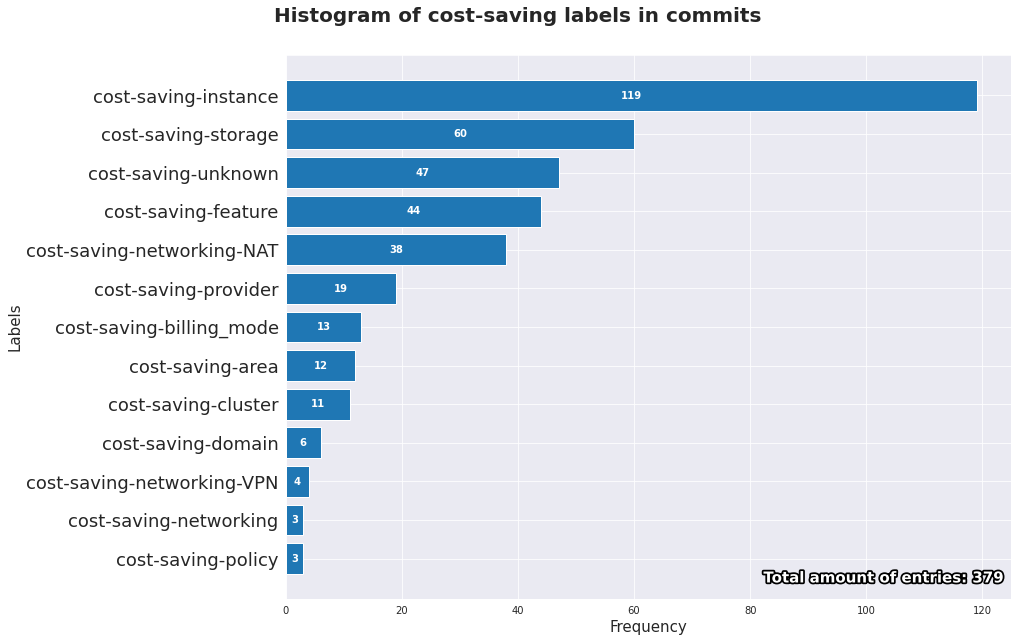

In [20]:
hist_saving = dict(sorted(hist_saving.items(), key=lambda item: item[1]))
figure, ax = plt.subplots(figsize=(13,10))
ax.barh(list(hist_saving.keys()), width=hist_saving.values())

plt.title("Histogram of cost-saving labels in commits", fontsize= 20, fontweight='bold', x=0.32, y=1.05)
plt.ylabel("Labels")
plt.xlabel("Frequency")

axes = plt.gca()
axes.yaxis.label.set_size(15)
axes.xaxis.label.set_size(15)

plt.tick_params(axis='y', labelsize=18)

for bar, label in zip(ax.patches, list(hist_saving.values())):
    plt.text(bar.get_width()/2, bar.get_y()+bar.get_height()/2, label, color = 'white', ha = 'center', va = 'center', fontweight='bold') 

txt = ax.text(103, -0.5, f"Total amount of entries: {saving_count}", color = 'white', ha = 'center', va = 'center', fontweight='bold', fontsize= 15)
txt.set_path_effects([pe.withStroke(linewidth=3.5, foreground='black')])

plt.savefig('commit-cost-saving-hist.png', bbox_inches='tight')

plt.show()

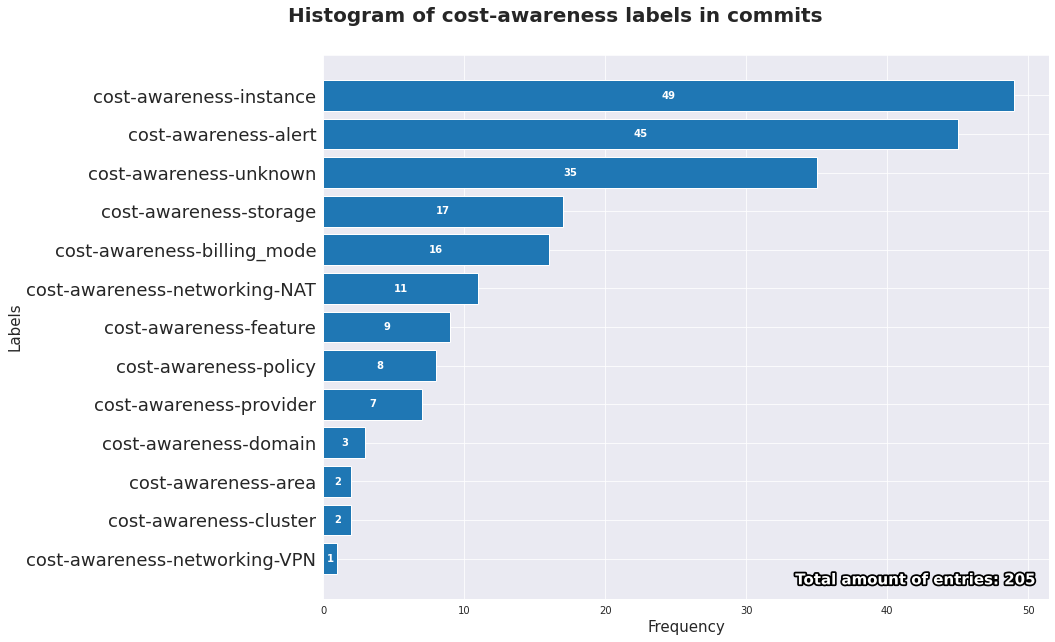

In [21]:
hist_awareness = dict(sorted(hist_awareness.items(), key=lambda item: item[1]))
figure, ax = plt.subplots(figsize=(13,10))
ax.barh(list(hist_awareness.keys()), width=hist_awareness.values())

plt.title("Histogram of cost-awareness labels in commits", fontsize= 20, fontweight='bold', x=0.32, y=1.05)
plt.ylabel("Labels")
plt.xlabel("Frequency")

axes = plt.gca()
axes.yaxis.label.set_size(15)
axes.xaxis.label.set_size(15)

plt.tick_params(axis='y', labelsize=18)

for bar, label in zip(ax.patches, list(hist_awareness.values())):
    plt.text(bar.get_width()/2, bar.get_y()+bar.get_height()/2, label, color = 'white', ha = 'center', va = 'center', fontweight='bold') 

txt = ax.text(42, -0.55, f"Total amount of entries: {awareness_count}", color = 'white', ha = 'center', va = 'center', fontweight='bold', fontsize= 15)
txt.set_path_effects([pe.withStroke(linewidth=3.5, foreground='black')])

plt.savefig('commit-cost-awareness-hist.png', bbox_inches='tight')

plt.show()

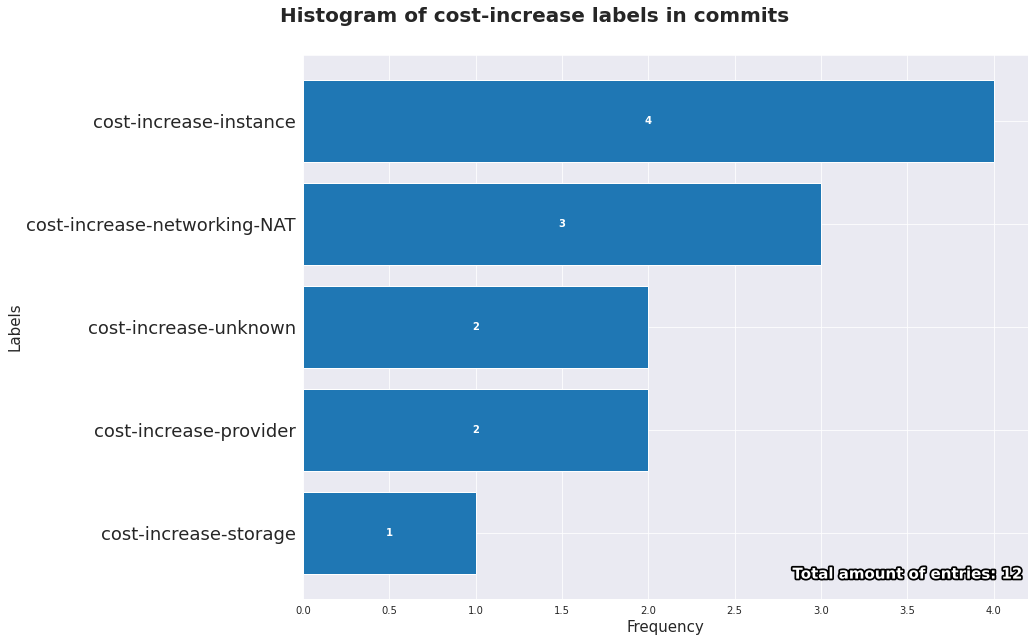

In [22]:
hist_increase = dict(sorted(hist_increase.items(), key=lambda item: item[1]))
figure, ax = plt.subplots(figsize=(13,10))
ax.barh(list(hist_increase.keys()), width=hist_increase.values())

plt.title("Histogram of cost-increase labels in commits", fontsize= 20, fontweight='bold', x=0.32, y=1.05)
plt.ylabel("Labels")
plt.xlabel("Frequency")

axes = plt.gca()
axes.yaxis.label.set_size(15)
axes.xaxis.label.set_size(15)

plt.tick_params(axis='y', labelsize=18)

for bar, label in zip(ax.patches, list(hist_increase.values())):
    plt.text(bar.get_width()/2, bar.get_y()+bar.get_height()/2, label, color = 'white', ha = 'center', va = 'center', fontweight='bold') 

txt = ax.text(3.5, -0.4, f"Total amount of entries: {increase_count}", color = 'white', ha = 'center', va = 'center', fontweight='bold', fontsize= 15)
txt.set_path_effects([pe.withStroke(linewidth=3.5, foreground='black')])

plt.savefig('cost-cost-increase-hist.png', bbox_inches='tight')

plt.show()

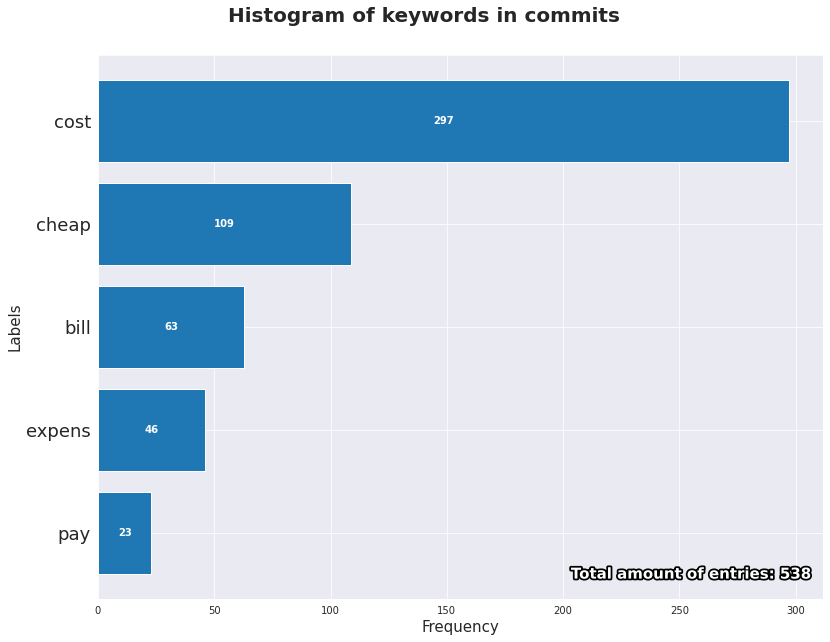

In [23]:
keyword_hist_cost = dict(sorted(keyword_hist_cost.items(), key=lambda item: item[1]))
figure, ax = plt.subplots(figsize=(13,10))
ax.barh(list(keyword_hist_cost.keys()), width=keyword_hist_cost.values())

plt.title("Histogram of keywords in commits", fontsize= 20, fontweight='bold', x=0.45, y=1.05)
plt.ylabel("Labels")
plt.xlabel("Frequency")

axes = plt.gca()
axes.yaxis.label.set_size(15)
axes.xaxis.label.set_size(15)

plt.tick_params(axis='y', labelsize=18)

for bar, label in zip(ax.patches, list(keyword_hist_cost.values())):
    plt.text(bar.get_width()/2, bar.get_y()+bar.get_height()/2, label, color = 'white', ha = 'center', va = 'center', fontweight='bold') 

txt = ax.text(255, -0.4, f"Total amount of entries: {sum(keyword_hist_cost.values())}", color = 'white', ha = 'center', va = 'center', fontweight='bold', fontsize= 15)
txt.set_path_effects([pe.withStroke(linewidth=3.5, foreground='black')])

plt.savefig('commit-histogram-keywords.png', bbox_inches='tight')

plt.show()

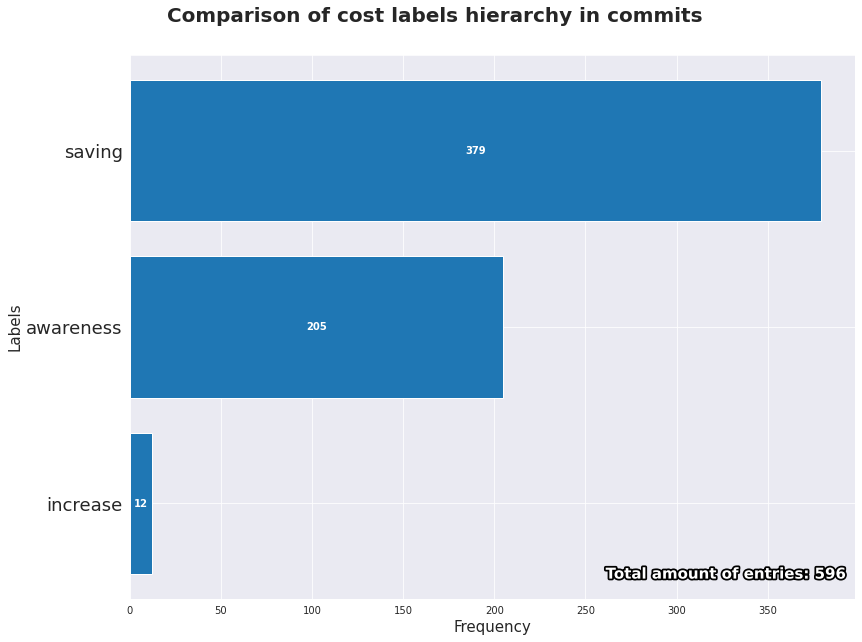

In [24]:
cost_label_dic = {"saving": saving_count, "awareness": awareness_count, "increase": increase_count}
cost_label_dic = dict(sorted(cost_label_dic.items(), key=lambda item: item[1]))
figure, ax = plt.subplots(figsize=(13,10))
ax.barh(list(cost_label_dic.keys()), width=cost_label_dic.values())

plt.title("Comparison of cost labels hierarchy in commits", fontsize= 20, fontweight='bold', x=0.42, y=1.05)
plt.ylabel("Labels")
plt.xlabel("Frequency")

axes = plt.gca()
axes.yaxis.label.set_size(15)
axes.xaxis.label.set_size(15)

plt.tick_params(axis='y', labelsize=18)

for bar, label in zip(ax.patches, list(cost_label_dic.values())):
    plt.text(bar.get_width()/2, bar.get_y()+bar.get_height()/2, label, color = 'white', ha = 'center', va = 'center', fontweight='bold') 

txt = ax.text(327, -0.4, f"Total amount of entries: {sum(cost_label_dic.values())}", color = 'white', ha = 'center', va = 'center', fontweight='bold', fontsize= 15)
txt.set_path_effects([pe.withStroke(linewidth=3.5, foreground='black')])

plt.savefig('commit-cost-hierarchy-comparison.png', bbox_inches='tight')

plt.show()

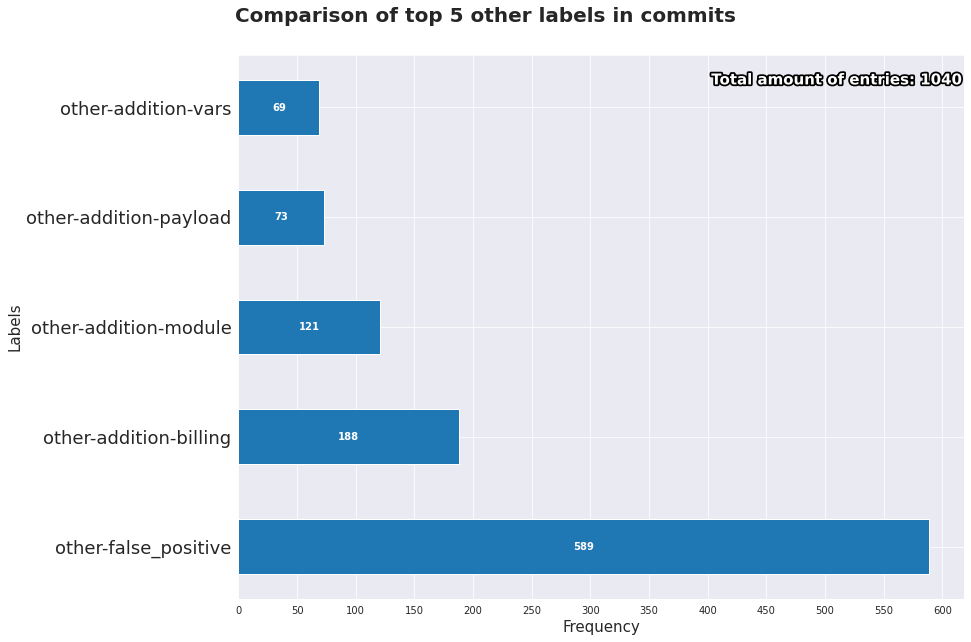

In [25]:
labels = []
values = []
count = 0
hist_other = dict(sorted(hist_other.items(), key=lambda item: -item[1]))
for item in hist_other.items():
    if count == 5:
        break
    labels.append(item[0])
    values.append(item[1])
    count += 1

x = np.arange(0, 601, 50)
figure, ax = plt.subplots(figsize=(13,10))
ax.barh(labels, width=values, height=.5)
plt.xticks(x)
plt.title("Comparison of top 5 other labels in commits", fontsize= 20, fontweight='bold', x=0.34, y=1.05)
plt.ylabel("Labels")
plt.xlabel("Frequency")


figure.patch.set_facecolor('white')

axes = plt.gca()
axes.yaxis.label.set_size(15)
axes.xaxis.label.set_size(15)

plt.tick_params(axis='y', labelsize=18)

for bar, label in zip(ax.patches, values):
    plt.text(bar.get_width()/2, bar.get_y()+bar.get_height()/2, label, color = 'white', ha = 'center', va = 'center', fontweight='bold')

txt = ax.text(510, 4.25, f"Total amount of entries: {sum(values)}", color = 'white', ha = 'center', va = 'center', fontweight='bold', fontsize= 15)
txt.set_path_effects([pe.withStroke(linewidth=3.5, foreground='black')])

plt.savefig('other-5label-comparison.png', bbox_inches='tight')
plt.show()

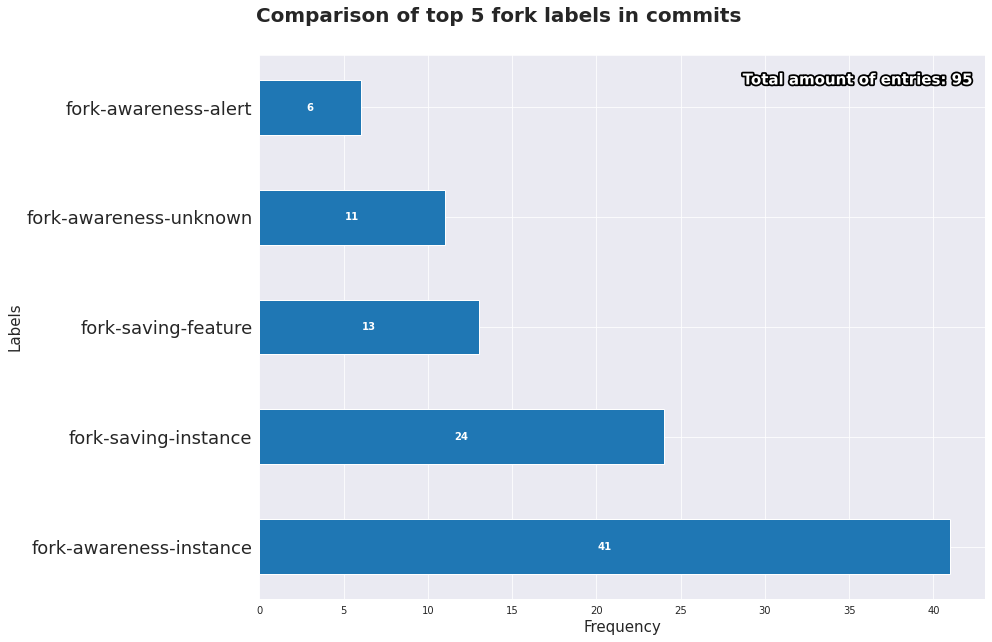

In [26]:
labels = []
values = []
count = 0
hist_forks = dict(sorted(hist_forks.items(), key=lambda item: -item[1]))
for item in hist_forks.items():
    if count == 5:
        break
    labels.append(item[0])
    values.append(item[1])
    count += 1

x = np.arange(0, 45, 5)
figure, ax = plt.subplots(figsize=(13,10))
ax.barh(labels, width=values, height=.5)
plt.xticks(x)
plt.title("Comparison of top 5 fork labels in commits", fontsize= 20, fontweight='bold', x=0.33, y=1.05)
plt.ylabel("Labels")
plt.xlabel("Frequency")


figure.patch.set_facecolor('white')

axes = plt.gca()
axes.yaxis.label.set_size(15)
axes.xaxis.label.set_size(15)

plt.tick_params(axis='y', labelsize=18)

for bar, label in zip(ax.patches, values):
    plt.text(bar.get_width()/2, bar.get_y()+bar.get_height()/2, label, color = 'white', ha = 'center', va = 'center', fontweight='bold')

txt = ax.text(35.5, 4.25, f"Total amount of entries: {sum(values)}", color = 'white', ha = 'center', va = 'center', fontweight='bold', fontsize= 15)
txt.set_path_effects([pe.withStroke(linewidth=3.5, foreground='black')])

plt.savefig('other-5fork-comparison.png', bbox_inches='tight')
plt.show()